# **Project Title: Data-Driven Insights into Consumer Behavior and Sales: A Comprehensive Analysis**

by Saurav Premkumar

##Project Objective: Analyzing Amazon Sales and Consumer Behavior for Comprehensive Market Understanding

##Data overview:
*   Amazon Customer Behavior Survey- survey, 2023, 602 rows and 22 columns
*   Amazon Sales Dataset- This dataset is scraped from the official website of Amazon, relatively new, 1465 rows and 16 columns


##D1. Library imports

In [ ]:
! pip install kaggle --quiet

In [ ]:
%env KAGGLE_USERNAME=sauravpk
%env KAGGLE_KEY=4d53357a3e2b93c7728b1fcf8b3b11cb

env: KAGGLE_USERNAME=sauravpk
env: KAGGLE_KEY=4d53357a3e2b93c7728b1fcf8b3b11cb


In [ ]:
! kaggle datasets download -d swathiunnikrishnan/amazon-consumer-behaviour-dataset
! kaggle datasets download -d karkavelrajaj/amazon-sales-dataset

amazon-consumer-behaviour-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
amazon-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/amazon-consumer-behaviour-dataset.zip
! unzip /content/amazon-sales-dataset.zip

Archive:  /content/amazon-consumer-behaviour-dataset.zip
replace Amazon Customer Behavior Survey.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
consumer=pd.read_csv("/content/Amazon Customer Behavior Survey.csv",header=0)
sales=pd.read_csv("/content/amazon.csv",header=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## D2. Data pre-processing

In [ ]:
sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
#subsetting
subsetdf = ['product_id', 'product_name', 'category', 'discounted_price',
                    'actual_price', 'discount_percentage', 'rating', 'rating_count','review_title']
selected_sales_columns= sales[subsetdf]
selected_sales_columns.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269","Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928","Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363","Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905","As good as original,Decent,Good one for second..."


In [ ]:
selected_sales_columns.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
review_title           object
dtype: object

In [ ]:
#Changing the data type of discounted price and actual price

selected_sales_columns['discounted_price'] = selected_sales_columns['discounted_price'].str.replace("₹",'')
selected_sales_columns['discounted_price'] = selected_sales_columns['discounted_price'].str.replace(",",'')
selected_sales_columns['discounted_price'] = selected_sales_columns['discounted_price'].astype('float64')

selected_sales_columns['actual_price'] = selected_sales_columns['actual_price'].str.replace("₹",'') ## changing the Price from INR to Float value
selected_sales_columns['actual_price'] = selected_sales_columns['actual_price'].str.replace(",",'')
selected_sales_columns['actual_price'] = selected_sales_columns['actual_price'].astype('float64')

#Changing Datatype and values in Discount Percentage

selected_sales_columns['discount_percentage'] = selected_sales_columns['discount_percentage'].str.replace('%','').astype('float64')

selected_sales_columns['discount_percentage'] = selected_sales_columns['discount_percentage'] / 100

selected_sales_columns['discount_percentage']

<ipython-input-10-aab420c99339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_sales_columns['discounted_price'] = selected_sales_columns['discounted_price'].str.replace("₹",'')
<ipython-input-10-aab420c99339>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_sales_columns['discounted_price'] = selected_sales_columns['discounted_price'].str.replace(",",'')
<ipython-input-10-aab420c99339>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [ ]:
selected_sales_columns.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                  object
rating_count            object
review_title            object
dtype: object

In [ ]:
selected_sales_columns['rating'].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [ ]:
selected_sales_columns.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,"Decent product,doesn't pick up sand,Ok ok,Must..."


In [ ]:
##I went to the amazon page to get the rating and found that the product id of B08L12N5H1 has a rating of 4. So I am going to give the item rating a 4.0 as well.
##Source: https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1
selected_sales_columns['rating'] = selected_sales_columns['rating'].str.replace('|', '4.0').astype('float64')

<ipython-input-14-8008dda3cef4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  selected_sales_columns['rating'] = selected_sales_columns['rating'].str.replace('|', '4.0').astype('float64')
<ipython-input-14-8008dda3cef4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_sales_columns['rating'] = selected_sales_columns['rating'].str.replace('|', '4.0').astype('float64')


In [ ]:
selected_sales_columns.isna().sum() #checking for NaN values

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
review_title           0
dtype: int64

In [ ]:
cleaned_sales_columns=selected_sales_columns.dropna()##dropping the 2 rows with NaN
cleaned_sales_columns.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
review_title           0
dtype: int64

In [ ]:
cleaned_sales_columns.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269","Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928","Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363","Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905","As good as original,Decent,Good one for second..."


In [ ]:
consumer.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [ ]:

consumer.drop(consumer.columns[17], axis=1, inplace=True)


In [ ]:
#subsetting
subset_df2 = [
    'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories','Personalized_Recommendation_Frequency','Browsing_Frequency',
    'Product_Search_Method', 'Search_Result_Exploration','Add_to_Cart_Browsing','Cart_Completion_Frequency','Cart_Abandonment_Factors','Saveforlater_Frequency',
    'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Recommendation_Helpfulness','Shopping_Satisfaction'
]
selected_consumer_columns = consumer[subset_df2]
selected_consumer_columns.head()

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Recommendation_Helpfulness,Shopping_Satisfaction
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,Yes,1
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,Sometimes,2
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,No,3
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,Sometimes,4
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,Yes,2


In [ ]:
## Checking for NaN Values
selected_consumer_columns.isna().sum()

age                                      0
Gender                                   0
Purchase_Frequency                       0
Purchase_Categories                      0
Personalized_Recommendation_Frequency    0
Browsing_Frequency                       0
Product_Search_Method                    2
Search_Result_Exploration                0
Add_to_Cart_Browsing                     0
Cart_Completion_Frequency                0
Cart_Abandonment_Factors                 0
Saveforlater_Frequency                   0
Review_Left                              0
Review_Reliability                       0
Review_Helpfulness                       0
Recommendation_Helpfulness               0
Shopping_Satisfaction                    0
dtype: int64

In [ ]:
cleaned_consumer_columns=selected_consumer_columns.dropna()## dropping the 2 rows with NaN values
cleaned_consumer_columns.isna().sum()

age                                      0
Gender                                   0
Purchase_Frequency                       0
Purchase_Categories                      0
Personalized_Recommendation_Frequency    0
Browsing_Frequency                       0
Product_Search_Method                    0
Search_Result_Exploration                0
Add_to_Cart_Browsing                     0
Cart_Completion_Frequency                0
Cart_Abandonment_Factors                 0
Saveforlater_Frequency                   0
Review_Left                              0
Review_Reliability                       0
Review_Helpfulness                       0
Recommendation_Helpfulness               0
Shopping_Satisfaction                    0
dtype: int64

## D3. Data analysis

###Does Product Rating Influence Sales?



Correlation between product ratings and sales: 0.15938760189955956


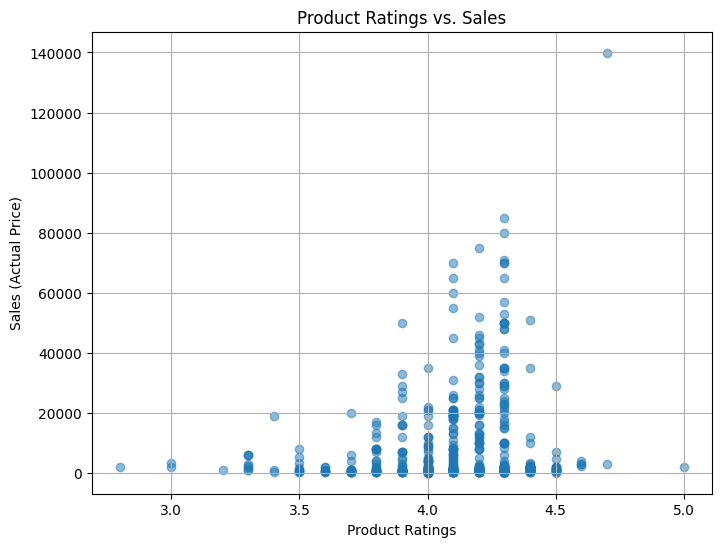

In [ ]:

# Calculate the correlation between product ratings and sales
correlation = cleaned_sales_columns['rating'].corr(cleaned_sales_columns['actual_price'])
print(f"Correlation between product ratings and sales: {correlation}")

# Scatter plot of product ratings vs. sales
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_sales_columns['rating'], cleaned_sales_columns['actual_price'], alpha=0.5)
plt.title('Product Ratings vs. Sales')
plt.xlabel('Product Ratings')
plt.ylabel('Sales (Actual Price)')
plt.grid(True)
plt.show()

###How Do Purchase Habits Vary by Age and Gender?

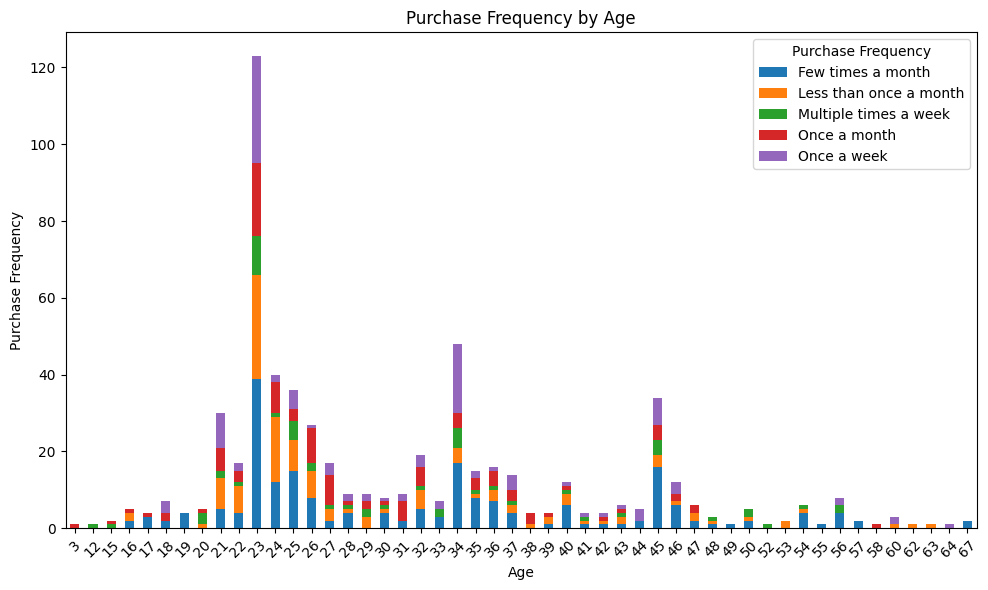

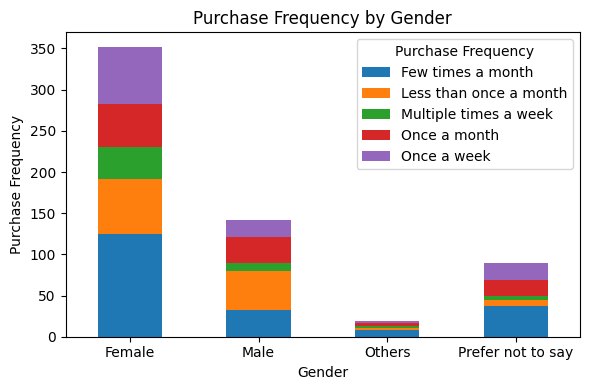

In [ ]:

# Analyzing purchase frequencies by age
purchase_by_age = selected_consumer_columns.groupby('age')['Purchase_Frequency'].value_counts().unstack().fillna(0)

# Plotting purchase frequencies by age
purchase_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purchase Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.legend(title='Purchase Frequency')
plt.tight_layout()
plt.show()

# Analyzing purchase frequencies by gender
purchase_by_gender = selected_consumer_columns.groupby('Gender')['Purchase_Frequency'].value_counts().unstack().fillna(0)

# Plotting purchase frequencies by gender
purchase_by_gender.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=0)
plt.legend(title='Purchase Frequency')
plt.tight_layout()
plt.show()


###3. Impact of Personalized Recommendations on Purchase Behavior?

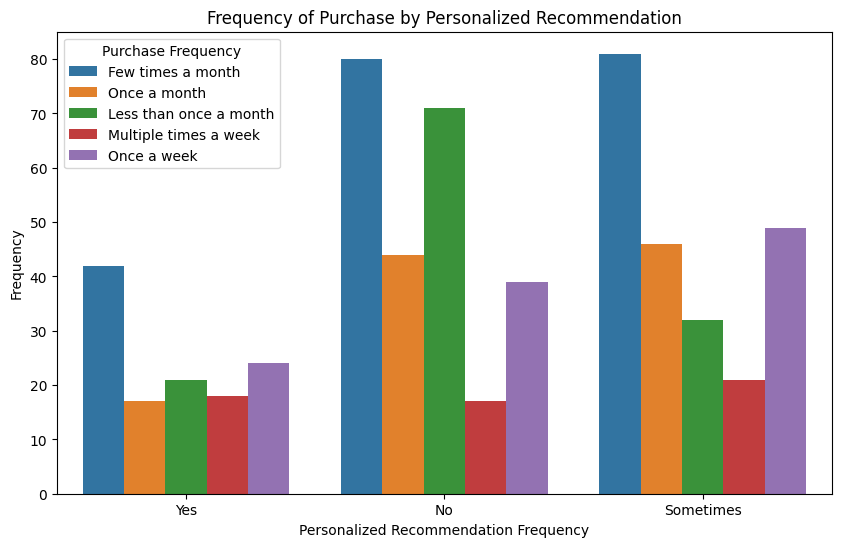

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Personalized_Recommendation_Frequency', hue='Purchase_Frequency', data=selected_consumer_columns)
plt.xlabel('Personalized Recommendation Frequency')
plt.ylabel('Frequency')
plt.title('Frequency of Purchase by Personalized Recommendation')
plt.legend(title='Purchase Frequency')
plt.show()


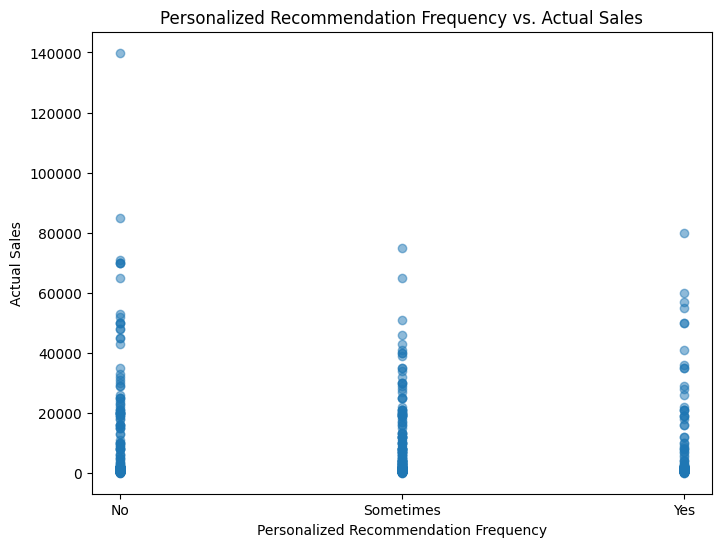

In [ ]:

min_rows = min(len(selected_consumer_columns), len(cleaned_sales_columns))
selected_consumer_columns = selected_consumer_columns.head(min_rows)
cleaned_sales_columns = cleaned_sales_columns.head(min_rows)

# Convert 'actual_price' to numeric in sales data
cleaned_sales_columns['actual_price'] = pd.to_numeric(cleaned_sales_columns['actual_price'], errors='coerce')

# Set the mapping of numerical categories to string categories
category_map = {0: 'No', 1: 'Sometimes', 2: 'Yes'}

# Calculate correlation between 'actual_price' and 'Personalized_Recommendation_Frequency'
correlation = cleaned_sales_columns['actual_price'].corr(selected_consumer_columns['Personalized_Recommendation_Frequency'].astype('category').cat.codes)

# Plotting the relationship using a scatter plot with custom x-axis ticks
plt.figure(figsize=(8, 6))
plt.scatter(selected_consumer_columns['Personalized_Recommendation_Frequency'].astype('category').cat.codes, cleaned_sales_columns['actual_price'], alpha=0.5)
plt.xticks(selected_consumer_columns['Personalized_Recommendation_Frequency'].astype('category').cat.codes.unique(), [category_map[x] for x in selected_consumer_columns['Personalized_Recommendation_Frequency'].astype('category').cat.codes.unique()])
plt.title('Personalized Recommendation Frequency vs. Actual Sales')
plt.xlabel('Personalized Recommendation Frequency')
plt.ylabel('Actual Sales')
plt.show()



###Factors Affecting Cart Abandonment and Shopping Satisfaction?

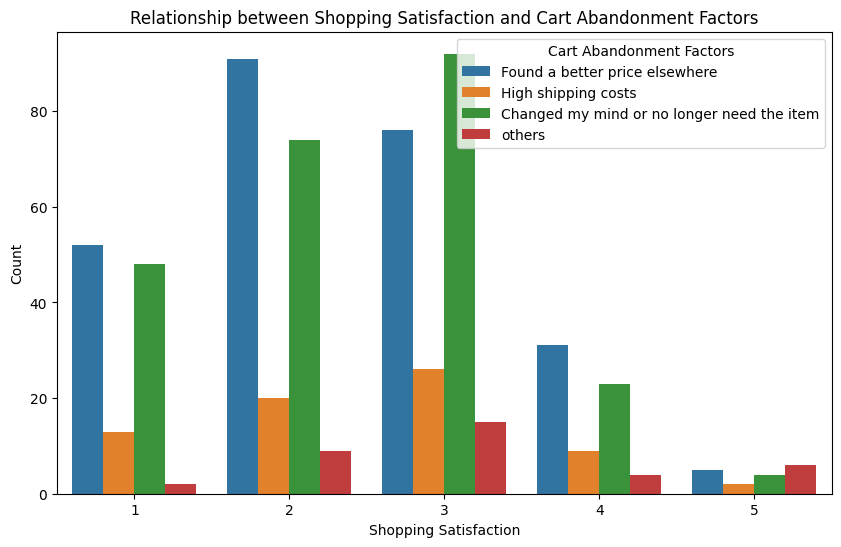

In [ ]:


plt.figure(figsize=(10, 6))
sns.countplot(x='Shopping_Satisfaction', hue='Cart_Abandonment_Factors', data=selected_consumer_columns)
plt.xlabel('Shopping Satisfaction')
plt.ylabel('Count')
plt.title('Relationship between Shopping Satisfaction and Cart Abandonment Factors')
plt.legend(title='Cart Abandonment Factors')
plt.show()


###How does the browsing frequency of consumers relate to the distribution of sales?

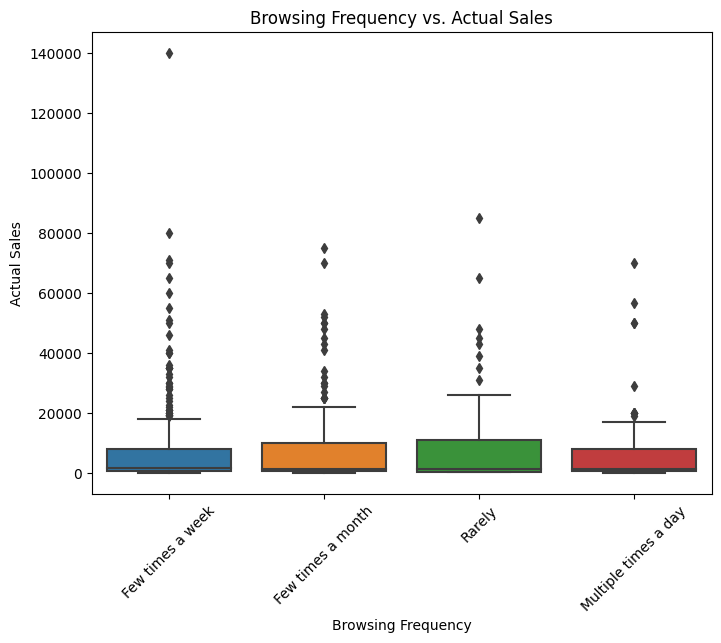

In [ ]:

# Plotting the relationship using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=selected_consumer_columns['Browsing_Frequency'], y=cleaned_sales_columns['actual_price'])
plt.title('Browsing Frequency vs. Actual Sales')
plt.xlabel('Browsing Frequency')
plt.ylabel('Actual Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()


##D4. Summary of key findings

1. Product Rating Influence on Sales: A positive correlation (0.16) was observed between product ratings and sales. Notably, sales peaked around product ratings of 4 to 4.5, indicating higher sales for products with these ratings.

2. Age, Gender, and Purchase Habits: Consumers aged 23 displayed the highest purchase frequency, mainly shopping a few times a month and once a week. Females, in particular, exhibited a significantly higher purchase frequency compared to males, predominantly shopping a few times a month. This insight provides valuable marketing segmentation opportunities.

3. Impact of Personalized Recommendations: Those who made purchases based on personalized recommendations from Amazon (responding 'yes' or 'sometimes') showed higher purchase frequency and greater actual sales. Personalized recommendations evidently influence consumer behavior and drive higher sales.

4. Factors Affecting Cart Abandonment and Shopping Satisfaction: Low shopping satisfaction often correlated with cart abandonment, predominantly due to finding a better price elsewhere. Addressing this discrepancy might help reduce cart abandonment rates and enhance shopping satisfaction.

5. Browsing Frequency and Sales Distribution: Consumers who browsed a few times a week demonstrated a strong correlation with sales, followed by those browsing a few times a month. This suggests a relationship between browsing frequency and actual sales.

These insights provide actionable points for marketing strategies, highlighting the importance of product ratings, personalized recommendations, understanding consumer demographics, and improving overall shopping experiences to drive sales and reduce cart abandonment.

##D5 Further research

1. **NLP and Consumer Behavior**: Explore Natural Language Processing (NLP) techniques to analyze consumer reviews and sentiments.
2. **Dynamic Personalization Strategies**: Investigate more dynamic and real-time personalized recommendation systems. Employ machine learning models to create more sophisticated and responsive recommendations.
3. **Predictive Modeling**- Leverage advanced analytics and predictive modeling techniques to anticipate future consumer trends and behaviors.